<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=25>
        نمونه‌برداری
           علیرضا دهقانپور ۹۸۱۰۱۵۵۵
    </font>
   
</div>

<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=3>
در این سوال قصد داریم الگوریتم‌های مختلف نمونه‌برداری را پیاده‌سازی کنیم. هدف اصلی مقایسه‌ی حاصل این نمونه‌برداری‌ها با نقاط توزیع اصلی است. 
    </font>
</div>

In [26]:
import numpy as np

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در مرحله‌ی اول مجموعه‌ داده‌های مورد نیاز را برای نمونه‌برداری پیاده‌سازی می‌کنیم. در این قسمت از معادلات گوسی دوبعدی استفاده خواهیم کرد که از معادلات زیر استفاده می‌کند.
    </font>
    </div>

\begin{equation}
p
(
a
,
b
)
=
N
(
\begin{bmatrix}
a \\ b
\end{bmatrix}
;
\begin{bmatrix}
μ_a \\
μ_b
\end{bmatrix}
,
\begin{bmatrix}
σ_a &
c
o
v
(
a
,
b
) \\
c
o
v
(
a
,
b
) &
σ_b
\end{bmatrix}
)
=
N
(
\begin{bmatrix}
a \\
b
\end{bmatrix}
;
\begin{bmatrix}
0 \\
0
\end{bmatrix}
,
\begin{bmatrix}
1 &
0.5 \\
0.5 &
1
\end{bmatrix}
)
.
\end{equation}

In [2]:
a_mean = 0
b_mean = 0

a_sigma = 1
b_sigma = 1
a_b_cov = 0.5

joint_cov = np.vstack(((a_sigma, a_b_cov), (a_b_cov, b_sigma)))
joint_mu = np.vstack((a_mean, b_mean))

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
نمونه داده‌های مورد نیاز در پایین ذخیره شده است. نموداری از این داده‌ها برای مقایسه با داده‌های آتی در قسمت مشخص 
       شده رسم کنید
    </font>
    </div>

In [3]:
N = 1000
D = 2
L = np.linalg.cholesky(joint_cov)
samples_from_true_distribution = L @ np.random.randn(D, N) + joint_mu

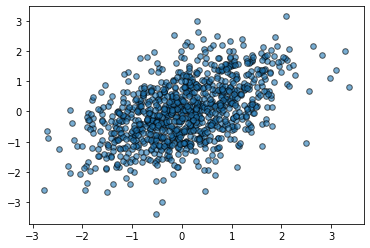

In [4]:
# plot datas
import matplotlib.pyplot as plt
plt.scatter(samples_from_true_distribution[0],
            samples_from_true_distribution[1],  cmap="Blues", alpha=0.6, edgecolor='black', linewidth=1 ,s = np.pi*10)

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Prior Sampling
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
الگوریتم نام‌برده شده را در این قسمت پیاده‌سازی کنید.
    </font>
    </div>

In [5]:
def prior_sampling(joint_mu, joint_cov):
    # insert code here
    y = np.random.normal(joint_mu[1], joint_cov[1][1], N)
    x_condition_y = []
    for i in range(N):
        x_condition_y.append(np.random.normal(joint_mu[0] + joint_cov[0][1] * (1.0/joint_cov[1][1]) * (y[i] - joint_mu[1]),
                                              joint_cov[0][0] - joint_cov[0][1] * (1/joint_cov[1][1]) * joint_cov[1][0]))

    x_condition_y = np.array(x_condition_y)
    sample = np.concatenate((x_condition_y.flatten(), y), axis=0)
    sample = np.reshape(sample, (D, N))
    return sample

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم نمودار راستی‌آزمایی کنید.
    </font>
    </div>

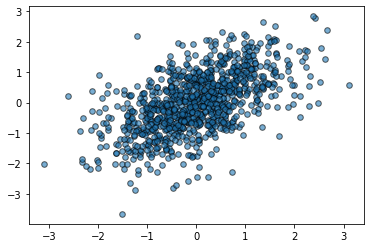

In [6]:
# plot data
sample = prior_sampling(joint_mu , joint_cov)
plt.scatter(sample[0],sample[1] , cmap="Blues", alpha=0.6, edgecolor='black', linewidth=1 ,s = np.pi*10)


<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Gibbs Sampling
        </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این قسمت باید این الگوریتم را در دو قسمت پیاده‌سازی کنید؛ در قسمت اول باید تابع فاصله‌های شرطی که برای این الگوریت نیاز است را پیاده‌سازی کنید. همانطور که می‌دانید، نمونه برداری گیبس به توزیع‌های شرطی برای هر متغیر نیاز دارد. در قسمت زیر این توزیع‌ها را برای توزیع گوسی پیاده کنید
    </font>
    </div>

In [7]:
def get_conditional_dist(joint_mu, joint_cov, index):
    # insert code here
    a = joint_mu[index]
    b = joint_mu[index]
    A = joint_cov[index, index]
    B = joint_cov[~index, ~index]
    C = joint_cov[index, ~index]

    def inner_func(value):
        mu = a + C * (1.0/B) * (value - b)
        sigma = A - (1.0/B) * C * C
        return np.sqrt(sigma) * np.random.randn(1) + mu
    return inner_func

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
خروجی تابع بالا را برای داده‌های موجود در متغیر زیر بریزید.
    </font>
    </div>

In [8]:
univariate_conditionals = []
for i in range(D):
    univariate_conditionals.append(
        get_conditional_dist(joint_mu, joint_cov, i))

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
الگوریتم نمونه‌برداری گیبس را با شرایط توضیح داده شده و برای داده‌های موجود پیاده‌سازی کنید؛
    </font>
    </div>

In [9]:
def gibbs_sampling():
    # insert code here
    samples = np.array([[0.5, 0.5]])
    for i in range(1, N):
        new_sample = samples[i-1]
        new_sample[i % D] = univariate_conditionals[i % D](samples[i - 1][~(i % D)])
        samples = np.append(samples, [new_sample], axis=0)
    return samples



<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم یک نمودار راستی‌آزمایی کنید.
    </font>
    </div>

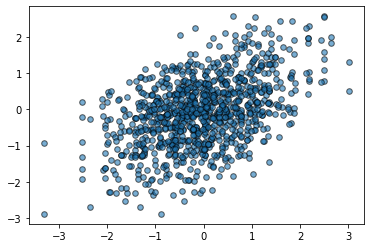

In [10]:
# plot data
sample = gibbs_sampling()
plt.scatter(sample[:,0],sample[:,1] , cmap="Blues", alpha=0.6, edgecolor='black', linewidth=1 ,s = np.pi*10)


<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Rejection Sampling
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
پیاده‌سازی این الگوریتم از الگوریتم گیبس ساده‌تر است. در قسمت تعیین شده، کد تابع این الگوریتم را پیاده‌سازی کنید. توجه کنید که اگر داده‌ها نیاز به نرمال‌سازی دارند، کد مربوط به این قسمت را هم در همین سل بنویسید.
    </font>
    </div>

In [49]:
from scipy.stats import multivariate_normal


def rejection_sampling():
    # insert code here
    pdf = multivariate_normal(mean=[a_mean, b_mean], cov=[
                              [a_sigma, a_b_cov], [a_b_cov, b_sigma]])
    samples_x = []
    samples_y = []
    for i in range(10*N):
        x = np.random.uniform(-3, 3)
        y = np.random.uniform(-3, 3)
        u = np.random.uniform(0, pdf.pdf([0, 0]))
        if pdf.pdf([x, y]) > u:
            samples_x.append(x)
            samples_y.append(y)
    return [samples_x, samples_y]

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم نمودار راستی‌آزمایی کنید.
    </font>
    </div>

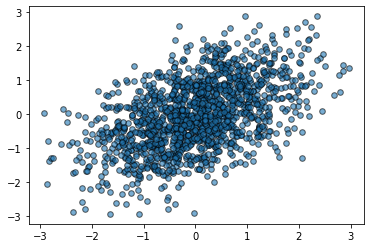

In [51]:
# plot data
samples = rejection_sampling()
plt.scatter(samples[0], samples[1], cmap="Blues", alpha=0.6,
            edgecolor='black', linewidth=1, s=np.pi*10)

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این مرحله، تعدادی نقطه را با استفاده از الگوریتم‌های پیاده‌سازی شده نمونه‌برداری کنید و با توزیع اصلی مقایسه کنید. نمودار‌های مورد نیاز برای هر قسمت را سل زیر رسم کنید. نتیجه‌گیری خود را به طور مختصر و مستند در قسمت تعیین شده بنویسید.
    </font>
    </div>

In [52]:
# plot data